# Market Value Developer Roles

Notebook for wrangling and reviewing data; seeking insights and opportuinies for refactoring. 

https://www.itjobswatch.co.uk

### Cleaning data

To reduce data redundancy, low information rows can be filtered out. Possible criteria could be found in:
* `median_salary` of 0; no indication of value
* Low number of `historical_ads`, 1 dosent quite indicate the existance of a job.
* 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/data.csv")
df.head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419
1,Developer,2,-1,50000,7.52,43794,28.86,10376
2,Finance,3,0,60000,9.09,31221,20.58,4946
3,SQL,4,0,48513,7.80,30300,19.97,5600
4,JavaScript,5,0,50000,11.11,26285,17.32,6126


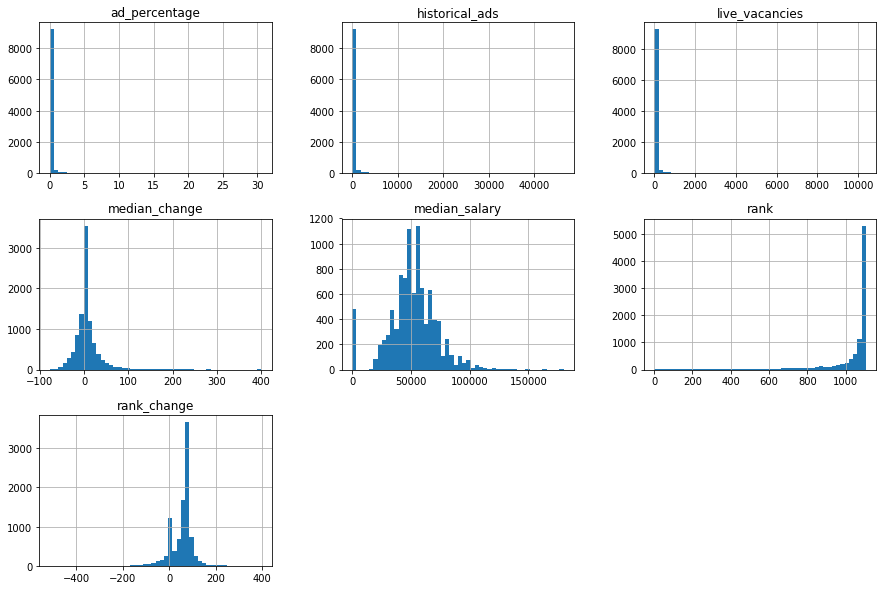

In [3]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [4]:
df.sort_values(by=['median_salary'], ascending=False).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
8164,Contract Management Executive,1103,0,180000,0.00,3,0.002,0
7986,Chief Software Architect,1103,74,165000,83.33,3,0.002,0
5499,Enterprise Solution Manager,1093,83,150000,66.66,13,0.009,1
8374,Slurm Workload Manager,1104,70,150000,284.61,2,0.001,6
9647,Quantitative Strategist,1105,0,150000,0.00,1,0.001,0


In [5]:
df.sort_values(by=['median_salary']).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
7718,Geospatial Analyst,1102,0,0,0.0,4,0.003,0
9150,Senior Ab Initio Developer,1105,0,0,0.0,1,0.001,1
4461,Elastic Path,1084,82,0,0.0,22,0.015,2
7502,TIBCO Architect,1102,65,0,0.0,4,0.003,5
4471,DesignOps,1084,73,0,0.0,22,0.015,2


In [6]:
df['total_ads'] = df.historical_ads + df.live_vacancies
# df['desirability'] = df.live_vacancies / df.total_ads

In [7]:
print(df.shape)
dfx = df.loc[df['historical_ads'] > 3]
print(dfx.shape)

(9690, 9)
(7749, 9)


In [8]:
dfx = df.loc[df['median_salary'] > 0]
print(dfx.shape)

(9209, 9)


In [9]:
dfx.head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies,total_ads
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419,54800
1,Developer,2,-1,50000,7.52,43794,28.86,10376,54170
2,Finance,3,0,60000,9.09,31221,20.58,4946,36167
3,SQL,4,0,48513,7.80,30300,19.97,5600,35900
4,JavaScript,5,0,50000,11.11,26285,17.32,6126,32411


In [10]:
dfx.sort_values(by=['ad_percentage'], ascending=False).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies,total_ads
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419,54800
1,Developer,2,-1,50000,7.52,43794,28.86,10376,54170
2,Finance,3,0,60000,9.09,31221,20.58,4946,36167
3,SQL,4,0,48513,7.80,30300,19.97,5600,35900
4,JavaScript,5,0,50000,11.11,26285,17.32,6126,32411


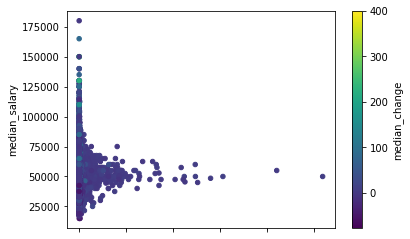

In [30]:
dfx.plot.scatter(x='live_vacancies', y='median_salary', c='median_change', colormap='viridis')

## Brevity

Instead of trying to have data on everything, which is large and has lots of redundancies, we can limit our display and analysis to technologies we are principally concerened with.  

In [11]:
def search(df, technology):
    query = "^{t}\s|\s{t}$|\s{t}\s|^{t}$".format(t=technology)
    return df[df['skill'].str.contains(query, case=False)]

def condensed(df, technologies):
    x = []
    for tech in technologies: 
        c = search(df, tech)
        x.append({
            'skill': tech,
            'live_vacancies': c['live_vacancies'].sum(), 
            'total_ads': c['total_ads'].sum(), 
            'median_salary': c['median_salary'].median(),
            'median_change': c['median_change'].mean(),
            'rank_change': c['rank_change'].mean()})
    return pd.DataFrame(x)

In [12]:
technologies = {'HTML','CSS','JavaScript','Angular','React','TypeScript',
                'Java','MySQL','Spring','Hibernate','Automation','Selenium',
                'Python','Django','SQL','Android','iOS','Full Stack',
                'Docker','Kubernetes','Agile','Git','C','C#'}

x = condensed(df, technologies)

In [13]:
x.sort_values(by=['live_vacancies'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
23,12969,4.255517,50000.0,30.344828,SQL,86845
12,9247,-1.092759,60000.0,43.413793,Agile,62095
22,8813,3.866744,47500.0,19.093023,C#,56118
5,8381,9.106932,62500.0,48.806818,Java,54681
0,6968,15.080000,52500.0,4.375000,JavaScript,36895


In [14]:
x.sort_values(by=['median_salary'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
18,1935,2.080000,63750.0,125.000000,Docker,10180
5,8381,9.106932,62500.0,48.806818,Java,54681
12,9247,-1.092759,60000.0,43.413793,Agile,62095
7,1750,11.941429,60000.0,57.000000,Spring,10502


In [15]:
x.sort_values(by=['median_change'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
1,4208,23.838000,47500.0,7.600000,CSS,21500
15,1277,17.783571,56250.0,33.714286,iOS,6994
0,6968,15.080000,52500.0,4.375000,JavaScript,36895
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
7,1750,11.941429,60000.0,57.000000,Spring,10502


In [16]:
x.sort_values(by=['rank_change'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
18,1935,2.080000,63750.0,125.000000,Docker,10180
19,2529,3.990000,58750.0,100.250000,React,11945
16,613,5.000000,52500.0,97.000000,TypeScript,2717
4,4005,3.607143,56250.0,69.857143,Python,23640


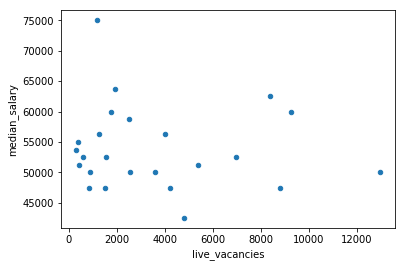

In [26]:
x.plot.scatter(x='live_vacancies', y='median_salary')